**Importing the packages and Libraries**

In [2]:
# Importing libraries and packages:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**A.Loading the Data**

In [4]:

image=[]
for i in range(10):
    image.append(mpimg.imread("C:/Users/shravs/OneDrive/Documents/Fall Semester/4661/Digit/"+str(i)+ ".jpg"))
    plt.imshow(image[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/shravs/OneDrive/Documents/Fall Semester/4661/Digit/0.jpg'

**B) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.**

In [3]:
size=1797
feature_matrix = np.ones((size, 64))


for i in range(size):
    img_arr = mpimg.imread("C:/Users/shravs/OneDrive/Documents/Fall Semester/4661/Digit/"+str(i)+ ".jpg")
    img_col = img_arr.flatten()
    feature_matrix[i]=np.copy(img_col)

feature_matrix.astype(int)

array([[  0,   2,  88, ...,   0,   9,   2],
       [  0,   0,  11, ..., 157,   0,  12],
       [  0,   0,   5, ..., 255, 138,   0],
       ...,
       [  5,   0,  22, ...,  87,  21,   0],
       [  7,   0,  22, ..., 196,   0,   7],
       [  0,  17, 155, ..., 198,  26,   0]])

In [4]:
X=pd.DataFrame(feature_matrix).astype(int)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


In [5]:
# Label vector

label_df = pd.read_csv("C:/Users/shravs/OneDrive/Documents/Fall Semester/4661/label.csv")
label_df



,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1792,1792,9
1793,1793,0
1794,1794,8
1795,1795,9


In [6]:
y = label_df['digit label']
y.head()

0    0
1    1
2    2
3    3
4    4
Name: digit label, dtype: int64

**C) Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.**

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# size of the traning set:
print(X_train.shape)
print(y_train.shape)

# size of the testing set:
print(X_test.shape)
print(y_test.shape)

(1617, 64)
(1617,)
(180, 64)
(180,)


**D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:**

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest =

RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

my_RF = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)


my_RF.fit(X_train, y_train)
y_predict = my_RF.predict(X_test)
print('List of digit label in y_predict:',y_predict)

print('List of digit label in y_test:', y_test)

accuracy =  accuracy_score(y_test, y_predict)

print("Random Forest: ", accuracy)

List of digit label in y_predict: [4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]
List of digit label in y_test: 154     4
564     0
1444    9
1394    1
1660    4
       ..
458     0
68      4
825     0
1153    0
1095    4
Name: digit label, Length: 180, dtype: int64
Random Forest:  0.9277777777777778


**E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')**

In [9]:
misclassified_result=[]
y_test_df = np.asarray(y_test)
misclassified = np.where(y_test_df != y_predict)
print(" Index values of misclassified images under y_predict and y_test list :")
print(misclassified[0])

for i in range(int(y_test_df.shape[0])):
    if y_predict[i] != y_test_df[i]:
        print(str(y_test.index.values[i]) + "jpg", ": ", "predict - ",y_predict[i], "and  actual - ", y_test_df[i])
        misclassified_result.append(y_test_df[i])

 Index values of misclassified images under y_predict and y_test list :
[  4  16  41  44  45  49  63  66 115 130 137 165 174]
1660jpg :  predict -  8 and  actual -  4
1611jpg :  predict -  7 and  actual -  4
123jpg :  predict -  1 and  actual -  8
1582jpg :  predict -  5 and  actual -  9
492jpg :  predict -  4 and  actual -  6
1603jpg :  predict -  7 and  actual -  3
1628jpg :  predict -  7 and  actual -  4
1605jpg :  predict -  2 and  actual -  3
794jpg :  predict -  1 and  actual -  8
37jpg :  predict -  5 and  actual -  9
69jpg :  predict -  7 and  actual -  9
1468jpg :  predict -  5 and  actual -  8
1573jpg :  predict -  4 and  actual -  0


1660 .jpg


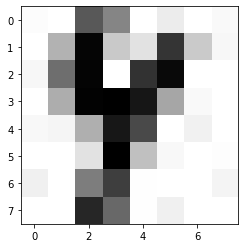

1611 .jpg


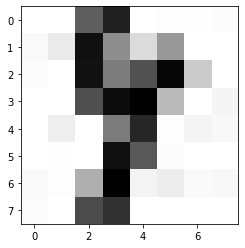

123 .jpg


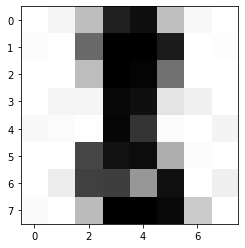

1582 .jpg


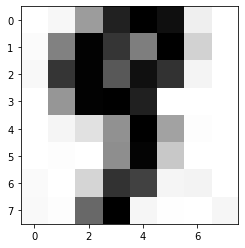

492 .jpg


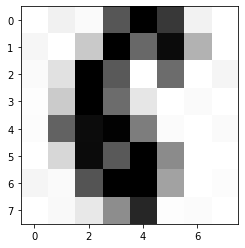

1603 .jpg


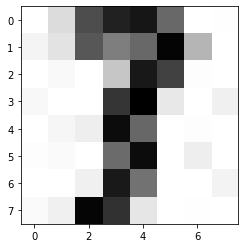

1628 .jpg


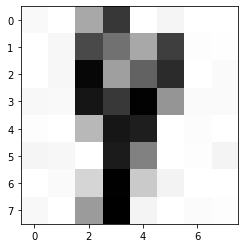

1605 .jpg


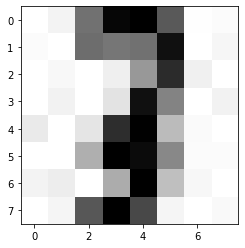

794 .jpg


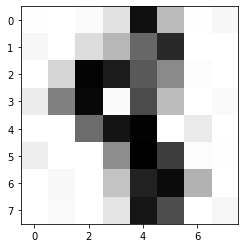

37 .jpg


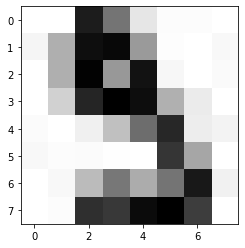

69 .jpg


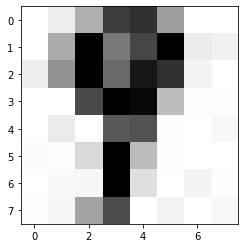

1468 .jpg


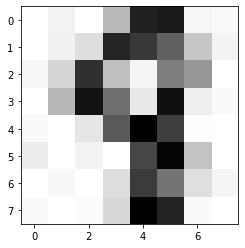

1573 .jpg


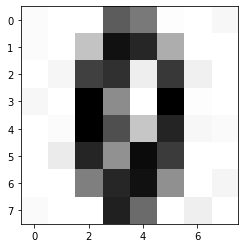

In [10]:

for j in misclassified[0]:
    
    image=mpimg.imread("C:/Users/shravs/OneDrive/Documents/Fall Semester/4661/Digit/"+str(y_test.index.values[j])+ ".jpg")
    name=str(y_test.index.values[j])
    print(name,'.jpg')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()